In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# importando os pacotes necessários
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [39]:
dataset_dir = '/content/drive/MyDrive/modulo10/images'

In [40]:
file_list = os.listdir(dataset_dir)
image_files = [file for file in file_list if file.endswith('.jpeg')]

In [41]:
from collections import Counter

# Mapeamento dos prefixos para os tipos de animais
prefix_to_animal = {
    'do': 'Cachorro',
    'ca': 'Gato',
    'co': 'Vaca',
    'ho': 'Cavalo',
    'sh': 'Ovelha'
}

# Contando os tipos de animais
animal_counts = Counter(prefix_to_animal[prefix] for file in image_files for prefix in prefix_to_animal if file.startswith(prefix))

# Quantidade de bovinos (vacas)
num_bovinos = animal_counts['Vaca']


In [42]:

# criando um dataframe para visualizar os dados
animal_df = pd.DataFrame(list(animal_counts.items()), columns=['Animal', 'Count'])


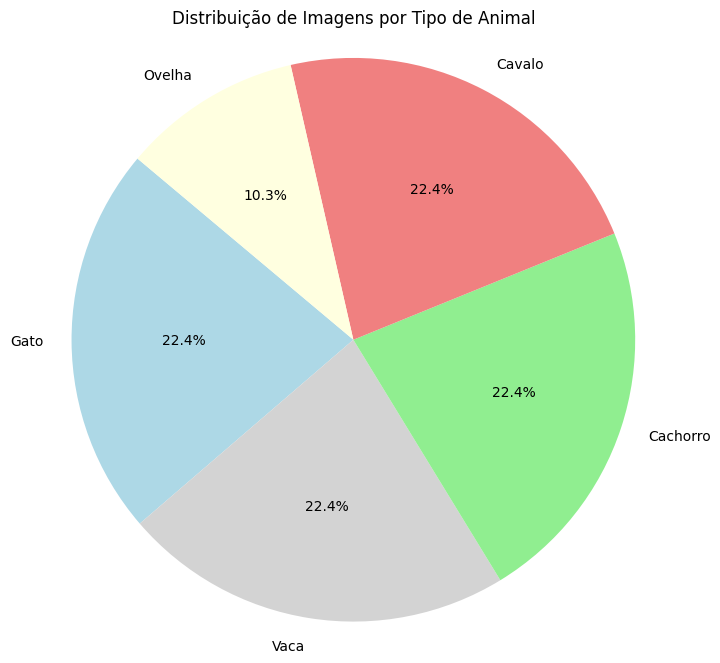

In [43]:
import matplotlib.pyplot as plt

# Definindo as cores para cada tipo de animal
colors = ['lightblue', 'lightgrey', 'lightgreen', 'lightcoral', 'lightyellow']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(animal_df['Count'], labels=animal_df['Animal'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Imagens por Tipo de Animal')
plt.axis('equal')
plt.show()


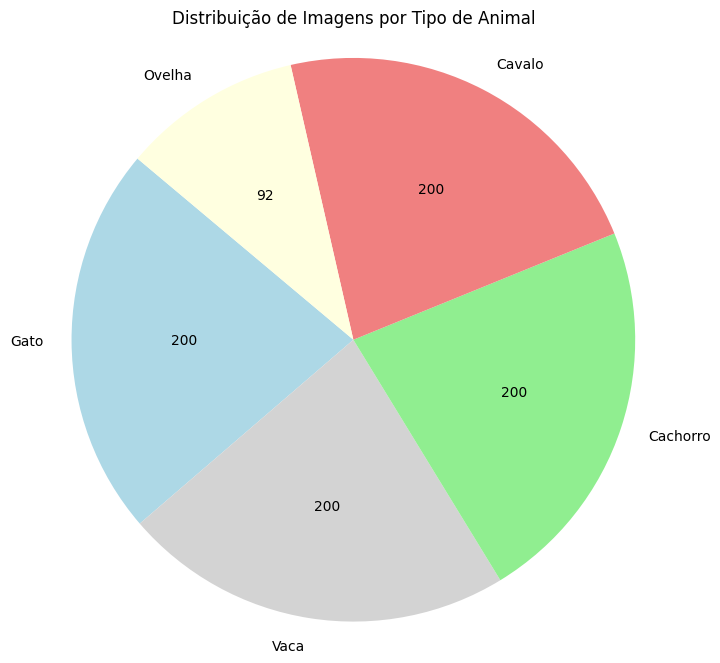

O número de bovinos é: 200


In [46]:
import matplotlib.pyplot as plt

# Supondo que o DataFrame `animal_df` já está definido
# animal_df = pd.DataFrame({'Animal': ['Cachorro', 'Gato', 'Vaca', 'Cavalo', 'Ovelha'],
#                           'Count': [5, 3, 7, 2, 4]})

# Definindo as cores para cada tipo de animal
colors = ['lightblue', 'lightgrey', 'lightgreen', 'lightcoral', 'lightyellow']

# Calculando o total de imagens
total_images = animal_df['Count'].sum()

# Função para exibir o número total corretamente
def absolute_value(val):
    a = int(round(val / 100 * total_images))
    return f'{a}'

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(animal_df['Count'], labels=animal_df['Animal'], colors=colors, autopct=absolute_value, startangle=140)
plt.title('Distribuição de Imagens por Tipo de Animal')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.show()

# Obtendo e imprimindo o número de bovinos (vacas)
num_bovinos = animal_df.loc[animal_df['Animal'] == 'Vaca', 'Count'].values[0]
print(f'O número de bovinos é: {num_bovinos}')


In [47]:
import cv2

bovino_dir = os.path.join(dataset_dir, 'bovinos')  # diretório para salvar as imagens de bovinos processadas

# verificando se o diretório de bovinos existe
if not os.path.exists(bovino_dir):
    os.makedirs(bovino_dir)

# listando todos os arquivos no diretório
file_list = os.listdir(dataset_dir)

# filtrando os arquivos jpeg das vacas
bovino_files = [file for file in file_list if file.endswith('.jpeg') and file.startswith('co')]

In [52]:
import cv2
import os

def process_image(image_path, output_path):
    """
    Processa a imagem carregada, aplicando equalização do histograma para melhorar o contraste.

    Args:
    - image_path (str): Caminho da imagem de entrada.
    - output_path (str): Caminho para salvar a imagem processada.
    """
    # Verificar se a imagem de entrada existe
    if not os.path.exists(image_path):
        print(f"Erro: O arquivo {image_path} não foi encontrado.")
        return

    # Carregando a imagem
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erro: Não foi possível carregar a imagem em {image_path}.")
        return

    # Convertendo a imagem para escala de cinza
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Equalizando o histograma
    equalized_image = cv2.equalizeHist(gray_image)

    # Salvando a imagem processada
    cv2.imwrite(output_path, equalized_image)
    print(f"Imagem processada salva em {output_path}")

# Exemplo de uso
# process_image('caminho_para_imagem.jpg', 'caminho_para_saida.jpg')


In [54]:
for file in bovino_files:
    input_path = os.path.join(dataset_dir, file)
    output_path = os.path.join(bovino_dir, file)
    process_image(input_path, output_path)

Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co124.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co100.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co120.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co13.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co114.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co123.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co115.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co106.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co126.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co11.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/bovinos/co137.jpeg
Imagem processada salva em /content/drive/MyDrive/modulo10/images/b

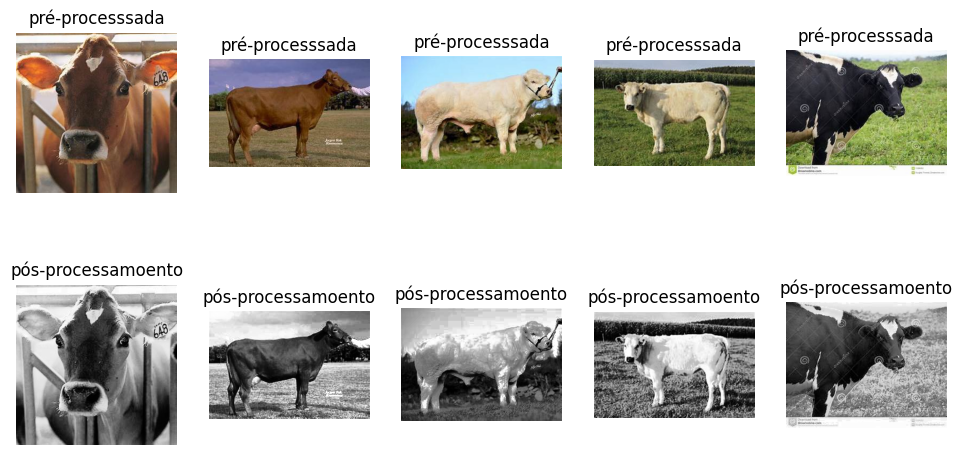

In [55]:
plt.figure(figsize=(12, 6))

for i, file in enumerate(bovino_files[:5]):
    original_image = cv2.imread(os.path.join(dataset_dir, file))
    processed_image = cv2.imread(os.path.join(bovino_dir, file), cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('pré-processsada')
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(processed_image, cmap='gray')
    plt.title('pós-processamoento')
    plt.axis('off')

plt.show()